# Exploring the 2012 Results of the Programme for International Student Assessment (PISA)

In [1]:
# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

## 1. Pick a dataset

I have choosen a Dataset of my own: The Data of the PISA 2012 Assessment. Specifically, in the past there has been a 'PISA Data Visualization Competition' and the orignal Dataset which has been used can still be downloaded:

http://www.oecd.org/pisa/pisaproducts/datavisualizationcontest.htm

**About the Survey Date:**<br>
PISA is a survey of students' skills and knowledge as they approach the end of compulsory education. It is not a conventional school test. Rather than examining how well students have learned the school curriculum, it looks at how well prepared they are for life beyond school.

**Around 510,000 students in 65 economies took part in the PISA 2012 assessment of reading, mathematics and science representing about 28 million 15-year-olds globally.** Of those economies, 44 took part in an assessment of creative problem solving and 18 in an assessment of financial literacy.

## 2. Pose at least three questions related to business or real-world applications of how the data could be used.

I am interested in how the four independent variables
- 'Gender', 
- 'Age at Start of Primary education', 
- 'Age at First use of computers' and 
- 'Out-of-School Study Time - Homework'<br>

affect various dependent variables such as<br>

- qualitative factors ('Satisfaction') as well as 
- quantitative factors ('Score in Mathmatics')

**Specifically, I am going to address the following Questions but I am going to explore other Correlations as well:**

- Do students who use Computers first early in their Life spend more time using the Computer?
- Do male Students make use of Computer programming more frequently?
- Does spending more time on Homework translates into higher Scores in mathematics and is there a Gender-Difference?

## 3. Create a Jupyter Notebook, using any associated packages you'd like, to...
### 3.1 Prepare data (Dataset has way to many variables (636 Columns) in order to handle every single one appropriately. Instead Data preparation is done when it comes to the variables of interest)

Import the Main Dataset

In [2]:
df = pd.read_csv('pisa2012.csv', encoding='ISO-8859-1')

C:\Users\Q416757\Anaconda3\envs\yourenvname\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (15,16,17,21,22,23,24,25,26,30,31,36,37,45,65,123,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,475) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


View first five rows of the Dataset

In [3]:
df.head()

,Unnamed: 0,CNT,SUBNATIO,STRATUM,OECD,NC,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,...,W_FSTR75,W_FSTR76,W_FSTR77,W_FSTR78,W_FSTR79,W_FSTR80,WVARSTRR,VAR_UNIT,SENWGT_STU,VER_STU
0,1,Albania,80000,ALB0006,Non-OECD,Albania,1,1,10,1.0,...,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13
1,2,Albania,80000,ALB0006,Non-OECD,Albania,1,2,10,1.0,...,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13
2,3,Albania,80000,ALB0006,Non-OECD,Albania,1,3,9,1.0,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13
3,4,Albania,80000,ALB0006,Non-OECD,Albania,1,4,9,1.0,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13
4,5,Albania,80000,ALB0006,Non-OECD,Albania,1,5,9,1.0,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13


In [32]:
df.shape

(485490, 636)

Import the Data Dictionary and print the first five rows

In [5]:
df_data_dict = pd.read_csv('pisadict2012.csv', encoding='ISO-8859-1')

In [6]:
df_data_dict.head()

,Unnamed: 0,x
0,CNT,Country code 3-character
1,SUBNATIO,Adjudicated sub-region code 7-digit code (3-di...
2,STRATUM,Stratum ID 7-character (cnt + region ID + orig...
3,OECD,OECD country
4,NC,National Centre 6-digit Code


In [11]:
df_data_dict = df_data_dict.rename(columns={'Unnamed: 0': 'column', 'x': 'description'})
df_data_dict.head()

,column,description
0,CNT,Country code 3-character
1,SUBNATIO,Adjudicated sub-region code 7-digit code (3-di...
2,STRATUM,Stratum ID 7-character (cnt + region ID + orig...
3,OECD,OECD country
4,NC,National Centre 6-digit Code


Print all columns. Since the columns does not have meaningful names I use the additional 'PISA Data Dictionary' for further exploration

In [28]:
for col in df.columns: 
    print(col, "\t", df_data_dict[df_data_dict.column == col].description.values) 

Unnamed: 0 	 []
CNT 	 ['Country code 3-character']
SUBNATIO 	 ['Adjudicated sub-region code 7-digit code (3-digit country code + region ID + stratum ID)']
STRATUM 	 ['Stratum ID 7-character (cnt + region ID + original stratum ID)']
OECD 	 ['OECD country']
NC 	 ['National Centre 6-digit Code']
SCHOOLID 	 ['School ID 7-digit (region ID + stratum ID + 3-digit school ID)']
STIDSTD 	 ['Student ID']
ST01Q01 	 ['International Grade']
ST02Q01 	 ['National Study Programme']
ST03Q01 	 ['Birth - Month']
ST03Q02 	 ['Birth -Year']
ST04Q01 	 ['Gender']
ST05Q01 	 ['Attend <ISCED 0>']
ST06Q01 	 ['Age at <ISCED 1>']
ST07Q01 	 ['Repeat - <ISCED 1>']
ST07Q02 	 ['Repeat - <ISCED 2>']
ST07Q03 	 ['Repeat - <ISCED 3>']
ST08Q01 	 ['Truancy - Late for School']
ST09Q01 	 ['Truancy - Skip whole school day']
ST115Q01 	 ['Truancy - Skip classes within school day']
ST11Q01 	 ['At Home - Mother']
ST11Q02 	 ['At Home - Father']
ST11Q03 	 ['At Home - Brothers']
ST11Q04 	 ['At Home - Sisters']
ST11Q05 	 ['At Home - Gra

### 3.2 Analyze, Model, and Visualize

#### 3.2.1 Indepentent variable: Age at Start of Primary education

What is the most common Age at Start of Primary education?

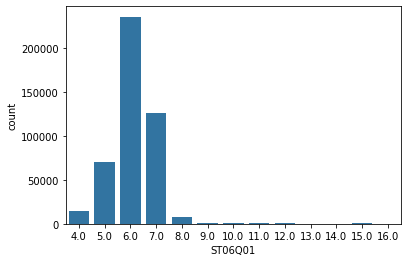

In [29]:
#Age at Start of Primary education
base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'ST06Q01', color = base_color)

Conclusion: Most students start latest at the age of 7. There are a few outliers (i.e. max at 16)  

**3.2.1.1 Dependent variable: Satisfied at School**

View all values of 'Satisfied at School'

In [11]:
#View all values of 'Satisfied at School'
df.ST87Q09.value_counts()

Agree                165955
Strongly agree        80448
Disagree              46903
Strongly disagree     17795
Name: ST87Q09, dtype: int64

**3.2.1.1 — 3.1 Prepare data**

Mapping categories to ordinal numeric values

In [12]:
#Mapping categories to ordinal numeric values
d = {'Strongly disagree': 1, 'Disagree': 2, 'Agree': 3, 'Strongly agree': 4}
df['ST87Q09_Mapped'] = df['ST87Q09'].map(d)

Describe Variables: Start of Primary education, Satisfied at School

In [24]:
#Describe Start of Primary education, Satisfied at School
df[['ST06Q01', 'ST87Q09_Mapped']].describe()

,ST06Q01,ST87Q09_Mapped
count,457994.000000,311101.000000
mean,6.148963,2.993427
std,0.970693,0.798821
min,4.000000,1.000000
25%,6.000000,3.000000
50%,6.000000,3.000000
75%,7.000000,4.000000
max,16.000000,4.000000


Visualization: Perceived Satisfaction at School Against Start of Primary education (Please refer to the Mapping done previously)

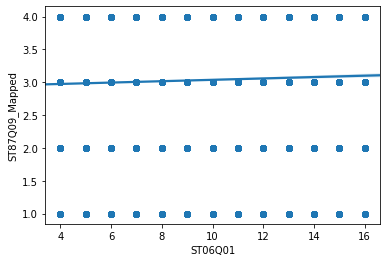

In [14]:
#Perceived Satisfaction at School Against Start of Primary education
sb.regplot(data = df, x = 'ST06Q01', y = 'ST87Q09_Mapped')

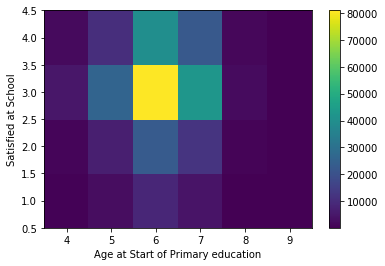

In [29]:
#Perceived Satisfaction at School Against Start of Primary education
bins_x = np.arange(3.5, 10, 1)
bins_y = np.arange(0.5, 5, 1)
plt.hist2d(data = df, x = 'ST06Q01', y = 'ST87Q09_Mapped', cmin = 0.5, bins = [bins_x, bins_y]);
plt.colorbar()
plt.xlabel('Age at Start of Primary education')
plt.ylabel('Satisfied at School');

Conclusion: There seems to be a slightly positive correlation between the Perceived Satisfaction at School and the Start of Primary education. Students who start later are more satisfied. The statistics used here are descriptive statistics, not inferential, meaning that I did not create any hypothesis or controlled experiments or inferences with my data

**3.2.1.2 Dependent variable: Make Friends Easily**

View all values of 'Make Friends Easily'

In [31]:
#View all values of 'Make Friends Easily'
df.ST87Q02.value_counts()

Agree                174067
Strongly agree       100024
Disagree              31913
Strongly disagree      6134
Name: ST87Q02, dtype: int64

**3.2.1.2 — 3.1 Prepare data**

Mapping categories to ordinal numeric values

In [32]:
#Mapping categories to ordinal numeric values
d = {'Strongly disagree': 1, 'Disagree': 2, 'Agree': 3, 'Strongly agree': 4}
df['ST87Q02_Mapped'] = df['ST87Q02'].map(d)

Visualization: Perceived Easyness of Friends-Making Against Start of Primary education (Please refer to the Mapping done previously)

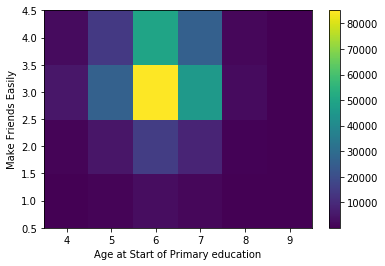

In [33]:
#Perceived Easyness of Friends-Making Against Start of Primary education
bins_x = np.arange(3.5, 10, 1)
bins_y = np.arange(0.5, 5, 1)
plt.hist2d(data = df, x = 'ST06Q01', y = 'ST87Q02_Mapped', cmin = 0.5, bins = [bins_x, bins_y]);
plt.colorbar()
plt.xlabel('Age at Start of Primary education')
plt.ylabel('Make Friends Easily');

Conclusion: There seems to be a slightly positive correlation between the Perceived Easiness of Friends-Making and the Start of Primary education. For Students who start later it is easier to make friends. The statistics used here are descriptive statistics, not inferential, meaning that I did not create any hypothesis or controlled experiments or inferences with my data

#### 3.2.2 Indepentent variable: Age at First use of computers

View all values of 'Age at First use of computers'

In [34]:
#View all values of 'Age at First use of computers'
df.IC03Q01.value_counts()

7-9 years old             125702
6 years old or younger     86237
10-12 years old            63517
13 years old  or older     16189
Never                       1571
Name: IC03Q01, dtype: int64

**3.2.2.0 — 3.1 Prepare data**<br>
<br>
Mapping categories to ordinal numeric values

In [35]:
#Mapping categories to ordinal numeric values
e = {'6 years old or younger': 1, '7-9 years old': 2, '10-12 years old': 3, '13 years old  or older': 4, 'Never': 5}
df['IC03Q01_Mapped'] = df['IC03Q01'].map(e)

What is the most common Age-Category at First Use of Computer? (Please refer to the Mapping done previously)

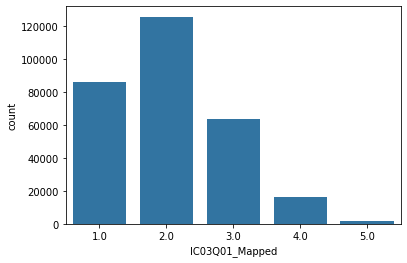

In [129]:
#Bar Chart 'Age at First use of computers'
base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'IC03Q01_Mapped', color = base_color)

**3.2.2.1 Dependent variable: Time of computer use (mins)**

Describe Data: 'Time of computer use (mins)

In [40]:
#Describe Data: 'Time of computer use (mins)'
df.TIMEINT.describe()

count    297074.000000
mean         50.895996
std          40.987895
min           0.000000
25%          19.000000
50%          39.000000
75%          71.000000
max         206.000000
Name: TIMEINT, dtype: float64

Do students spend a lot of time using the Computer?

(array([21352., 22173., 26676., 26869., 21976., 23125., 20859., 15868.,
        17601.,  5767., 20225.,  7327.,  5169.,  6726.,  9015.,  2662.,
          981., 10568.,  2977.,  2470.,     0., 10277.]),
 array([  0.5,   7. ,  13.5,  20. ,  26.5,  33. ,  39.5,  46. ,  52.5,
         59. ,  65.5,  72. ,  78.5,  85. ,  91.5,  98. , 104.5, 111. ,
        117.5, 124. , 130.5, 137. , 143.5]),
 <a list of 22 Patch objects>)

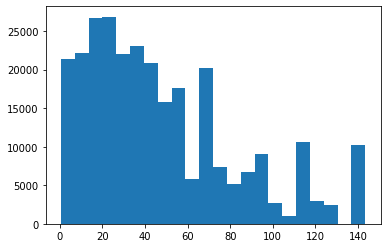

In [119]:
#Histogram of Time of computer use (mins)
bin_edges = np.arange(0.5, 150, 6.5)
plt.hist(data = df, x = 'TIMEINT', bins = bin_edges)

Conclusion: There is an overall negative trend. Many students spend rather little time of computer use, few students spend rather much time of computer use.

_____________________________________________________________________________________________________________________________________

Visualization: Time of computer use (mins) Against Age-Category at First use of computers (Please refer to the Mapping done previously)

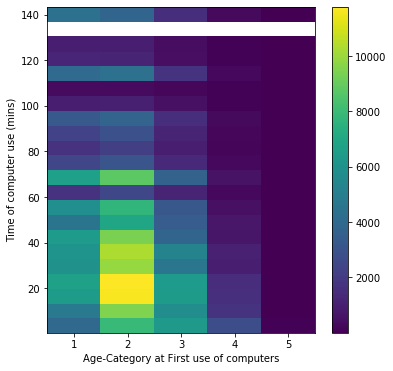

In [120]:
#Time of computer use (mins) Against Age-Category at First use of computers
plt.figure(figsize = [6, 6])
bins_x = np.arange(0.5, 6, 1)
bins_y = np.arange(0.5, 150, 6.5)
plt.hist2d(data = df, x = 'IC03Q01_Mapped', y = 'TIMEINT', cmin = 0.5, bins = [bins_x, bins_y]);
plt.colorbar()
plt.xlabel('Age-Category at First use of computers')
plt.ylabel('Time of computer use (mins)');

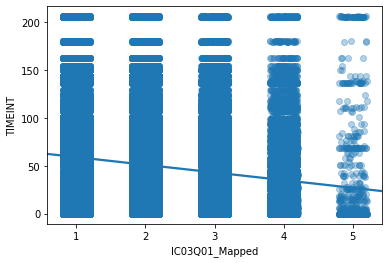

In [47]:
#Time of computer use (mins) Against Age-Category at First use of computers
sb.regplot(data = df, x = 'IC03Q01_Mapped', y = 'TIMEINT',
           x_jitter = 0.2, y_jitter = 0.2, scatter_kws = {'alpha' : 1/3})

Conclusion: There seems to be a slightly negative correlation between the Time of computer use (mins) and the Age-Category at First use of computers. Students who start early using computers spend on average more time using them. The statistics used here are descriptive statistics, not inferential, meaning that I did not create any hypothesis or controlled experiments or inferences with my data

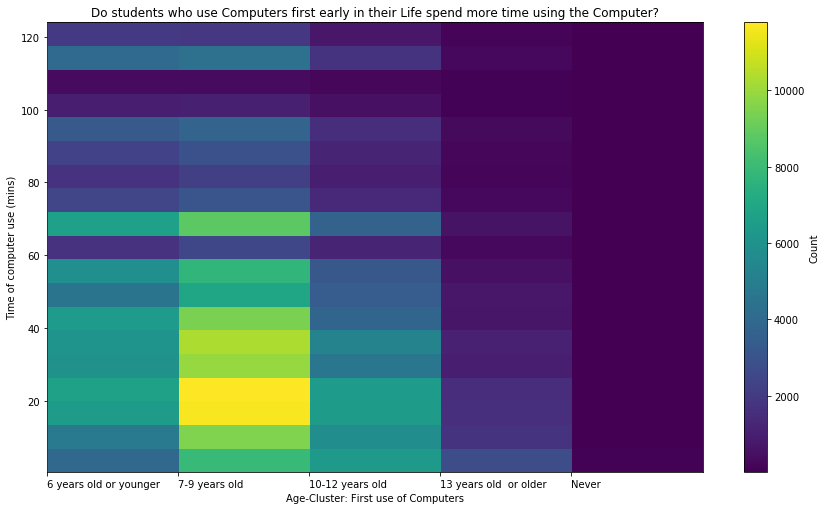

In [36]:
#Time of computer use (mins) Against Age-Category at First use of computers
plt.figure(figsize = [14.70, 8.27])
bins_x = np.arange(0.01, 6, 1)
bins_y = np.arange(0.5, 130, 6.5)
plt.hist2d(data = df, x = 'IC03Q01_Mapped', y = 'TIMEINT', cmin = 0.5, bins = [bins_x, bins_y], cmap = 'viridis');
plt.colorbar(label = 'Count')
plt.xlabel('Age-Cluster: First use of Computers')
plt.ylabel('Time of computer use (mins)')
plt.title('Do students who use Computers first early in their Life spend more time using the Computer?')
plt.xticks(np.arange(5), ('6 years old or younger', '7-9 years old', '10-12 years old', '13 years old  or older', 'Never'));

# gca = "get current axes"
ax = plt.gca()
# align tick labels left (center and right are the other options)
for label in ax.get_xticklabels():
    label.set_horizontalalignment('left')

**3.2.2.2 Dependent variable: Math Behaviour - Computer programming**

View all values of 'Math Behaviour - Computer programming'

In [49]:
#View all values of 'Math Behaviour - Computer programming'
df.ST49Q07.value_counts()

Never or rarely            185257
Sometimes                   68441
Often                       37373
Always or almost always     21354
Name: ST49Q07, dtype: int64

**3.2.2.2 — 3.1 Prepare data**<br>
<br>
Mapping categories to ordinal numeric values

In [50]:
#Mapping categories to ordinal numeric values
e = {'Never or rarely': 1, 'Sometimes': 2, 'Often': 3, 'Always or almost always': 4}
df['ST49Q07_Mapped'] = df['ST49Q07'].map(e)

Visualization: Frequency of Computer programming Against Age-Category at First use of computers (Please refer to the Mapping done previously)

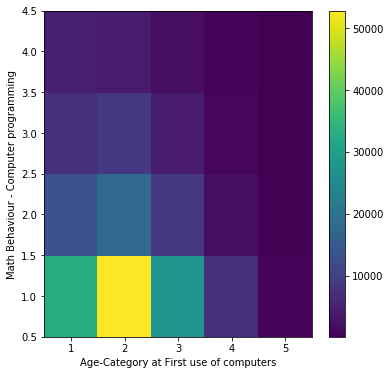

In [93]:
#Frequency of Computer programming Against Age-Category at First use of computers
plt.figure(figsize = [6, 6])
bins_x = np.arange(0.5, 6, 1)
bins_y = np.arange(0.5, 5, 1)
plt.hist2d(data = df, x = 'IC03Q01_Mapped', y = 'ST49Q07_Mapped', cmin = 0.5, bins = [bins_x, bins_y]);
plt.colorbar()
plt.xlabel('Age-Category at First use of computers')
plt.ylabel('Math Behaviour - Computer programming');

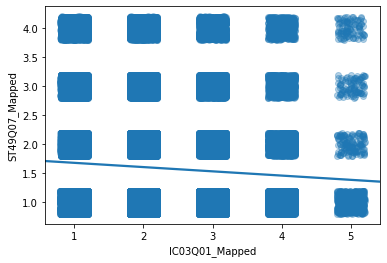

In [52]:
#Frequency of Computer programming Against Age-Category at First use of computers, scatterplot of discrete data with jitter and transparency
sb.regplot(data = df, x = 'IC03Q01_Mapped', y = 'ST49Q07_Mapped',
           x_jitter = 0.2, y_jitter = 0.2, scatter_kws = {'alpha' : 1/3})

Conclusion: Overall there seems to be a slightly negative correlation between the Frequency of Computer programming and the Age-Category at First use of computers. Students who start early using computers are programming more frequently (i.e. 'Often').

**3.2.2.2 Dependent variable: Gender**<br>
View all values of 'Gender'

In [53]:
#View all values of 'Gender'
df.ST04Q01.value_counts()

Female    245064
Male      240426
Name: ST04Q01, dtype: int64

Visualization: Frequency of Computer programming Against Gender 

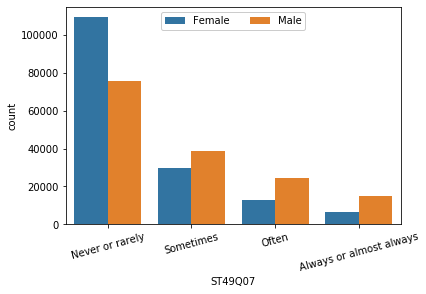

In [67]:
#Frequency of Computer programming Against Gender 
ax = sb.countplot(data = df, x = 'ST49Q07', hue = 'ST04Q01')
ax.legend(loc = 9, ncol = 2, framealpha = 1)
plt.xticks(rotation = 15);


Visualization: Mean of Frequency of Computer programming Against Age-Category at First use of computers + Gender-Difference

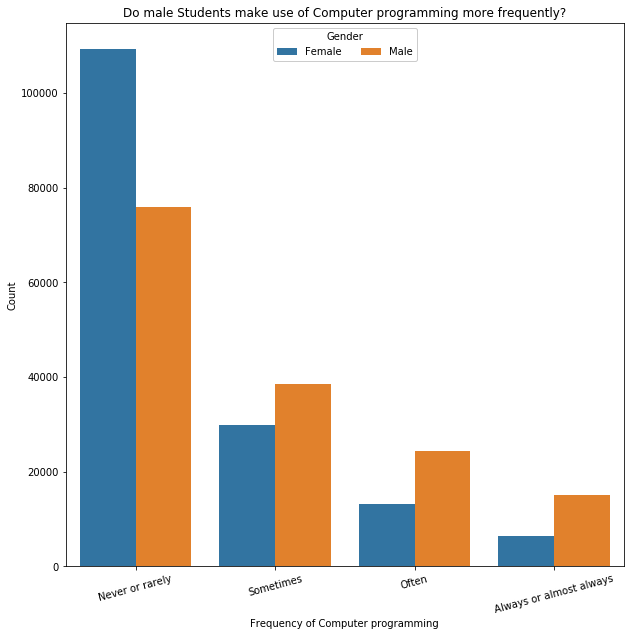

In [192]:
#Frequency of Computer programming Against Gender 
plt.figure(figsize = [10, 10])
ax = sb.countplot(data = df, x = 'ST49Q07', hue = 'ST04Q01')
ax.legend(loc = 9, ncol = 2, framealpha = 1, title = 'Gender')
plt.xticks(rotation = 15)
plt.title('Do male Students make use of Computer programming more frequently?')
plt.xlabel('Frequency of Computer programming')
plt.ylabel('Count');

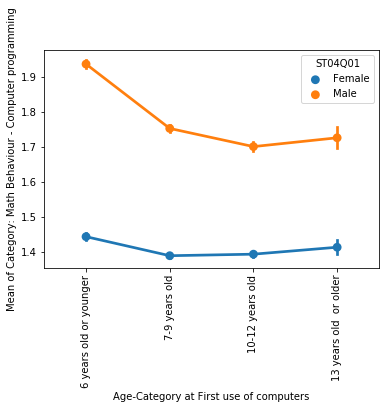

In [132]:
#Mean of Frequency of Computer programming Against Age-Category at First use of computers + Gender-Difference
df_sub = df[df['IC03Q01_Mapped'] != 5]
ax = sb.pointplot(data = df_sub, x = 'IC03Q01', y = 'ST49Q07_Mapped', hue = 'ST04Q01')
plt.xlabel('Age-Category at First use of computers')
plt.ylabel('Mean of Category: Math Behaviour - Computer programming');                 
plt.xticks(rotation = 90);

Conclusion: There seems to be a Gender-Gap: Women are less likely to program frequently. The overall relationship between the Frequency of Computer programming and the Age-Category at First use of computers seems not to be gender-specific, but there is a significant gap between both genders in absolute terms regarding the Frequency of Computer programming. 

The statistics used here are descriptive statistics, not inferential, meaning that I did not create any hypothesis or controlled experiments or inferences with my data

#### 3.2.3 Indepentent variable: Out-of-School Study Time - Homework

Describe variable 'Out-of-School Study Time - Homework'

In [127]:
#Describe 'Out-of-School Study Time - Homework'
df.ST57Q01.describe()

count    301367.000000
mean          5.493770
std           5.383815
min           0.000000
25%           2.000000
50%           4.000000
75%           7.000000
max          30.000000
Name: ST57Q01, dtype: float64

**3.2.3.1 Dependent variable: Score in mathematics**

Describe variable 'Score in mathematics'

In [73]:
#Describe 'Score in mathematics'
df.PV1MATH.describe()

count    485490.000000
mean        469.621653
std         103.265391
min          19.792800
25%         395.318600
50%         466.201900
75%         541.057800
max         962.229300
Name: PV1MATH, dtype: float64

Visualization: Score in mathematics Against Out-of-School Study Time - Homework

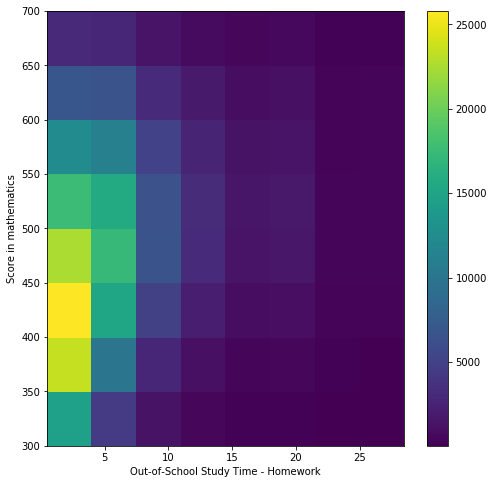

In [148]:
#Score in mathematics Against Out-of-School Study Time - Homework
plt.figure(figsize = [8, 8])
bins_x = np.arange(0.5, 30.5, 3.5)
bins_y = np.arange(300, 750, 50)
plt.hist2d(data = df, x = 'ST57Q01', y = 'PV1MATH', cmin = 0.5, bins = [bins_x, bins_y]);
plt.colorbar()
plt.xlabel('Out-of-School Study Time - Homework')
plt.ylabel('Score in mathematics');

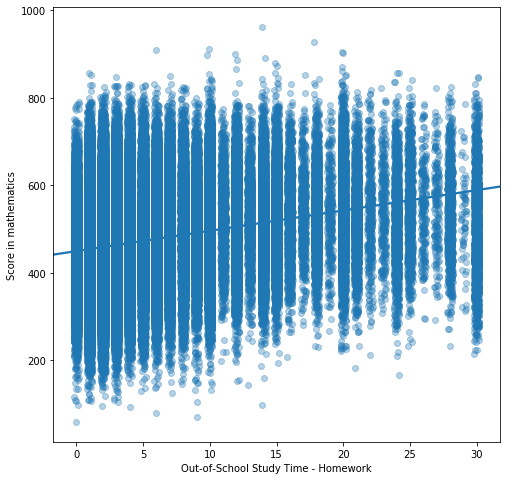

In [128]:
#Score in mathematics Against Out-of-School Study Time - Homework
plt.figure(figsize = [8, 8])
sb.regplot(data = df, x = 'ST57Q01', y = 'PV1MATH',
           x_jitter = 0.2, y_jitter = 0.2, scatter_kws = {'alpha' : 1/3})
plt.xlabel('Out-of-School Study Time - Homework')
plt.ylabel('Score in mathematics');

Visualization: Mean of Score in mathematics Against Out-of-School Study Time - Homework

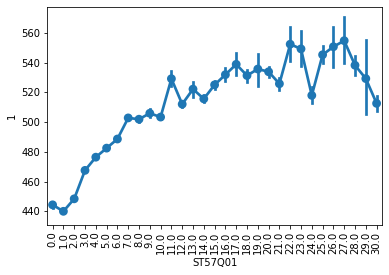

In [91]:
#Mean of Score in mathematics Against Out-of-School Study Time - Homework
sb.pointplot(data = df, x = 'ST57Q01', y = 'PV1MATH')
plt.ylabel('1')
plt.xticks(rotation = 90);

**3.2.3.2 Dependent variable: Gender**

Visualization: Score in mathematics Against Out-of-School Study Time - Homework + Gender-Difference

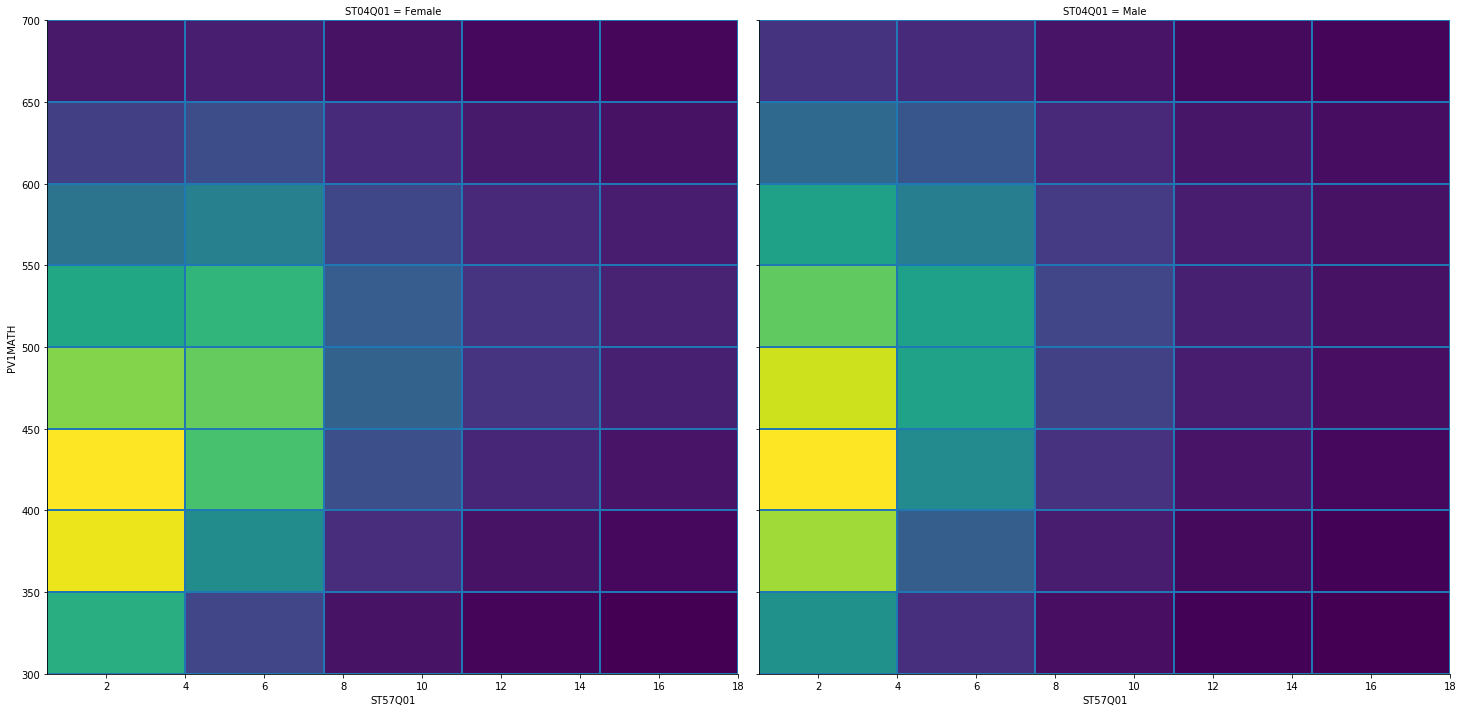

In [155]:
#Score in mathematics Against Out-of-School Study Time - Homework + Gender-Difference
bins_x = np.arange(0.5, 18.5, 3.5)
bins_y = np.arange(300, 750, 50)
g = sb.FacetGrid(data = df, col = 'ST04Q01', col_wrap = 5, size = 10)
g.map(plt.hist2d, 'ST57Q01', 'PV1MATH', bins = [bins_x, bins_y])

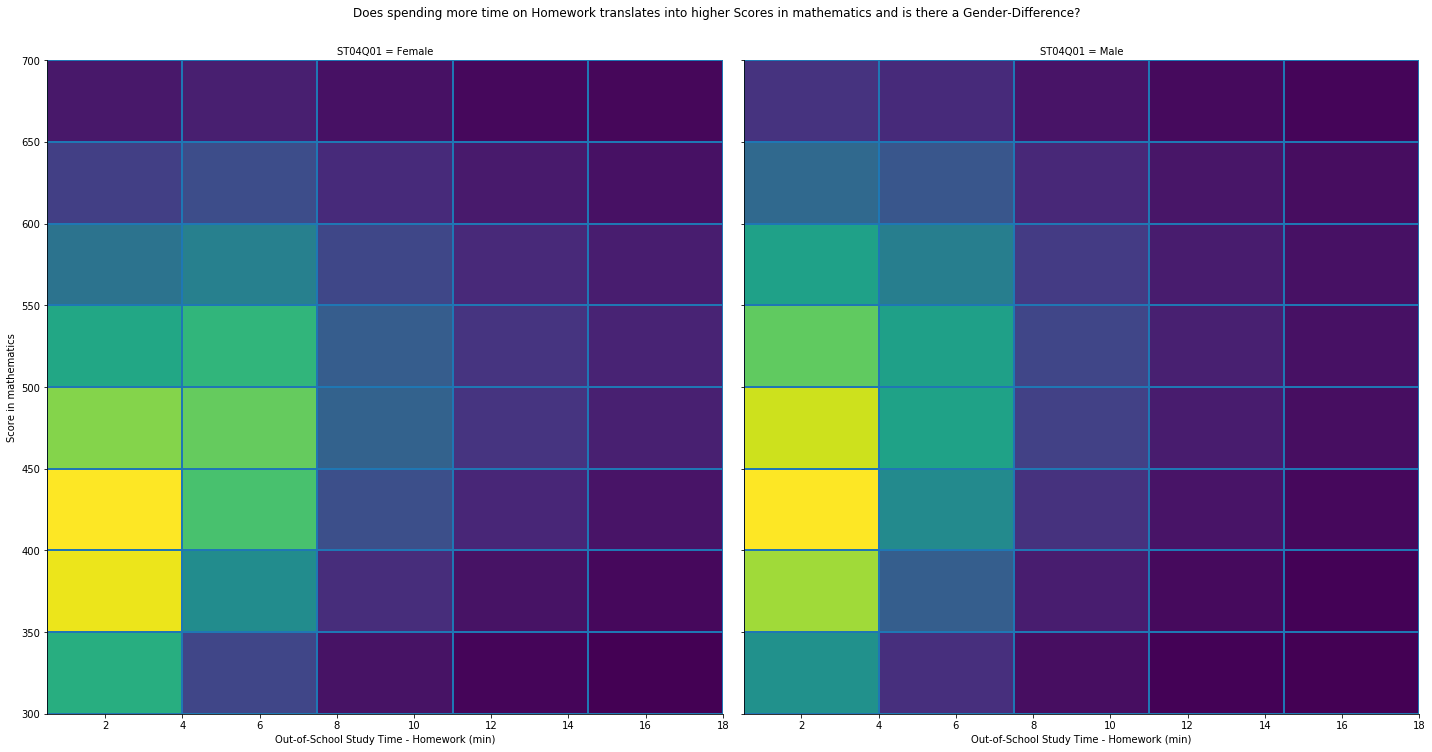

In [201]:
bins_x = np.arange(0.5, 18.5, 3.5)
bins_y = np.arange(300, 750, 50)
g = sb.FacetGrid(data = df, col = 'ST04Q01', size = 10)
g.map(plt.hist2d, 'ST57Q01', 'PV1MATH', bins = [bins_x, bins_y])
g.set_axis_labels("Out-of-School Study Time - Homework (min)", "Score in mathematics")
plt.suptitle("Does spending more time on Homework translates into higher Scores in mathematics and is there a Gender-Difference?", y = 1.04);
#g.fig.suptitle('Does spending more time on Homework translates into higher Scores in mathematics and is there a Gender-Difference?')
#plt.title('Does spending more time on Homework translates into higher Scores in mathematics and is there a Gender-Difference?')
#plt.xlabel('Out-of-School Study Time - Homework (min)')
#plt.ylabel('Score in mathematics');

How does the time spend on Homework differs between Men and Women?

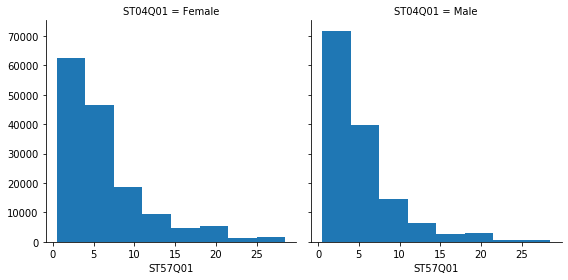

In [135]:
#Histogram of Out-of-School Study Time - Homework + Gender-Difference
bin_edges = np.arange(0.5, 30.5, 3.5)
g = sb.FacetGrid(data = df, col = 'ST04Q01', size = 4)
g.map(plt.hist, 'ST57Q01', bins = bin_edges)

How much time on average is spend on Homework for each Gender?

In [144]:
#Describe Out-of-School Study Time of Women
df.ST57Q01[df['ST04Q01'] == 'Female'].describe()

count    153577.000000
mean          6.153167
std           5.711883
min           0.000000
25%           2.000000
50%           4.000000
75%           8.000000
max          30.000000
Name: ST57Q01, dtype: float64

In [145]:
#Describe Out-of-School Study Time of Men
df.ST57Q01[df['ST04Q01'] == 'Male'].describe()

count    147790.000000
mean          4.808553
std           4.927639
min           0.000000
25%           2.000000
50%           3.000000
75%           6.000000
max          30.000000
Name: ST57Q01, dtype: float64

Visualization: Mean of Score in mathematics Against Out-of-School Study Time - Homework + Gender-Difference

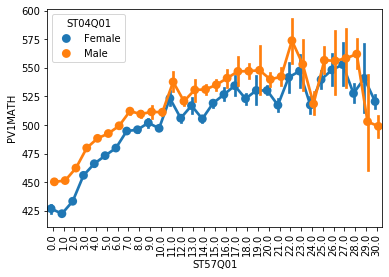

In [90]:
#Score in mathematics Against Out-of-School Study Time - Homework + Gender-Difference
ax = sb.pointplot(data = df, x = 'ST57Q01', y = 'PV1MATH', hue = 'ST04Q01',
                  dodge = 0.3,)
plt.xticks(rotation = 90);

Conclusion: There seems to be a positive correlation between the Out-of-School Study Time (Homework) and the Score in mathematics, but only to a certain point. The overall relationship between the Out-of-School Study Time (Homework) and the Score in mathematics seems not to be gender-specific, but there is a gap between both genders in absolute terms regarding the Score in mathematics. Despite women spend on average more time on Out-of-School Study they have at almost every bin of Out-of-School Study Time lower Scores in mathematics than men. The statistics used here are descriptive statistics, not inferential, meaning that I did not create any hypothesis or controlled experiments or inferences with my data